
C
- it decides the distance between marginal line and best fit line.
- Higher C --> Less margin, tries to classify all training points correctly risk of overfitting 
- Lower C -->  Larger margin, may misclassify more points but improves generalization.

gamma

- It  essentially defines the priority or influence of individual data points in determining the shape of the decision boundary.
- High gamma --> High priority to nearby points. This can lead to overfitting, as even small changes in data can cause large shifts in the boundary.
- Low gamma --> Low priority to individual points,so Points influence the decision boundary more broadly and smoothly. This reduces the risk of overfitting, but might underfit if the data is complex.

Kernel

- We can use our own transformation Function


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as ply
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.svm import SVC

In [3]:
from sklearn.datasets import make_classification
X,Y=make_classification(n_samples=1000,n_features=2,n_informative=2,n_classes=2,n_redundant=0,random_state=15)

In [4]:
pd.DataFrame(X)

,0,1
0,-0.466936,1.066595
1,-0.057744,-0.215454
2,-1.269010,0.909052
3,1.419482,-0.096061
4,-1.560283,3.718366
...,...,...
995,0.681529,1.415888
996,0.776098,1.332720
997,0.790451,1.290018
998,-1.221078,-0.654072


<Axes: xlabel='0', ylabel='1'>

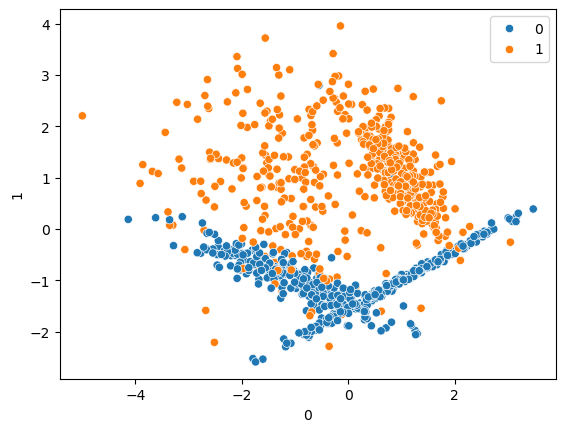

In [5]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1],hue=Y)

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.3,random_state=42)

In [7]:
# Linear SVM
from sklearn.svm import SVC
linear_svc=SVC(kernel='linear',C=10,gamma=4.7)
linear_svc.fit(X_train,Y_train)
Y_pred=linear_svc.predict(X_test)

print(accuracy_score(Y_test,Y_pred)) 
print(confusion_matrix(Y_test,Y_pred)) 
print(classification_report(Y_test,Y_pred))

0.9066666666666666
[[135   6]
 [ 22 137]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       141
           1       0.96      0.86      0.91       159

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [8]:
# polynomial SVM
from sklearn.svm import SVC
poly_svc=SVC(kernel='poly',C=10,gamma=4.7)
poly_svc.fit(X_train,Y_train)
Y_pred=poly_svc.predict(X_test)

print(accuracy_score(Y_test,Y_pred)) 
print(confusion_matrix(Y_test,Y_pred)) 
print(classification_report(Y_test,Y_pred))

0.9266666666666666
[[135   6]
 [ 16 143]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       141
           1       0.96      0.90      0.93       159

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [9]:
# Sigmoid SVM
from sklearn.svm import SVC
sigmoid_svc=SVC(kernel='sigmoid',C=10,gamma=4.7)
sigmoid_svc.fit(X_train,Y_train)
Y_pred=sigmoid_svc.predict(X_test)

print(accuracy_score(Y_test,Y_pred)) 
print(confusion_matrix(Y_test,Y_pred)) 
print(classification_report(Y_test,Y_pred))

0.7333333333333333
[[108  33]
 [ 47 112]]
              precision    recall  f1-score   support

           0       0.70      0.77      0.73       141
           1       0.77      0.70      0.74       159

    accuracy                           0.73       300
   macro avg       0.73      0.74      0.73       300
weighted avg       0.74      0.73      0.73       300



In [10]:
# rbf SVM
from sklearn.svm import SVC
rbf_svc=SVC(kernel='rbf',C=10,gamma=4.7)
rbf_svc.fit(X_train,Y_train)
Y_pred=rbf_svc.predict(X_test)

print(accuracy_score(Y_test,Y_pred)) 
print(confusion_matrix(Y_test,Y_pred)) 
print(classification_report(Y_test,Y_pred))

0.94
[[138   3]
 [ 15 144]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       141
           1       0.98      0.91      0.94       159

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [ ]:
# Hyper Parameter Tuning 
from sklearn.model_selection import GridSearchCV
svc=SVC()
params={
	'C':[.001,.01,1,10,100],
	'kernel':['rbf'],
	'gamma':[.1,6.7,4.99],
	'random_state': [15,42]
}

grid=GridSearchCV(estimator=svc,param_grid=params,cv=5)
grid.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 1, 10, 100],
                         'gamma': [0.1, 6.7, 4.99], 'kernel': ['rbf'],
                         'random_state': [15, 42]})

In [12]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf', 'random_state': 15}

In [13]:
Y_pred=grid.predict(X_test)

print(accuracy_score(Y_test,Y_pred)) 
print(confusion_matrix(Y_test,Y_pred)) 
print(classification_report(Y_test,Y_pred))

0.9433333333333334
[[139   2]
 [ 15 144]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       141
           1       0.99      0.91      0.94       159

    accuracy                           0.94       300
   macro avg       0.94      0.95      0.94       300
weighted avg       0.95      0.94      0.94       300

